<a href="https://colab.research.google.com/github/yaman9675/Boston-House-Price-Prediction/blob/main/M4W1D2_Assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
#import klib
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #file path reading or csv upload to coolab from drive
file_path='/content/drive/MyDrive/Colab Notebooks/Data/housing.csv'     
house_df=pd.read_csv(file_path)

In [ ]:
house_df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [ ]:
house_df.columns

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [ ]:
house_df.shape

(505, 1)

In [ ]:
# Importing the dataset
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/housing.csv' ,sep ='\s+', names = columns)

In [ ]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
housing_df.shape

(506, 14)

In [ ]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


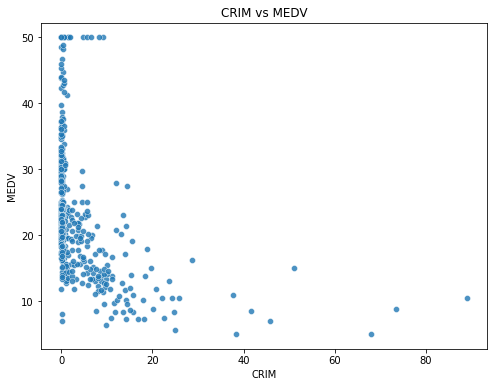

In [ ]:
#creating scatter plot to understand various correlation between CRIM vs MEDV
plt.figure(figsize=(8,6))
visual1 = sns.scatterplot(x=housing_df['CRIM'], y=housing_df['MEDV'], alpha=0.8)
plt.title('CRIM vs MEDV')
visual1



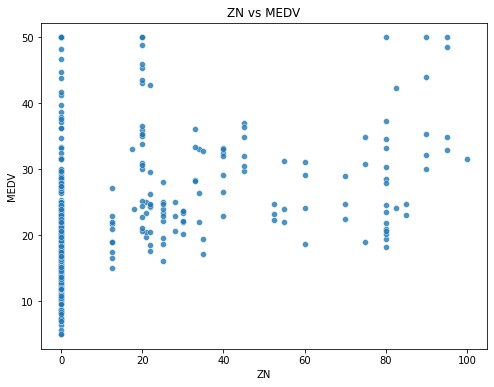

In [ ]:
#creating scatter plot to understand various correlation between ZN vs MEDV
plt.figure(figsize=(8,6))
visual2 = sns.scatterplot(x=housing_df['ZN'], y=housing_df['MEDV'], alpha=0.8)
plt.title('ZN vs MEDV')
visual2

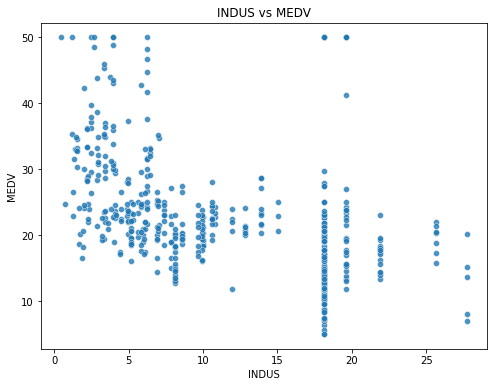

In [ ]:
#creating scatter plot to understand various correlation between INDUS vs MEDV
plt.figure(figsize=(8,6))
visual3 = sns.scatterplot(x=housing_df['INDUS'], y=housing_df['MEDV'], alpha=0.8)
plt.title('INDUS vs MEDV')
visual3

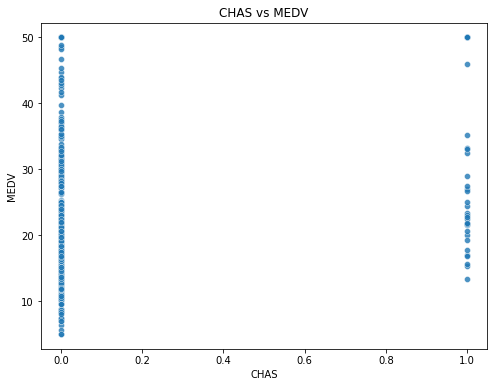

In [ ]:
#creating scatter plot to understand various correlation between CHAS vs MEDV
plt.figure(figsize=(8,6))
visual4 = sns.scatterplot(x=housing_df['CHAS'], y=housing_df['MEDV'], alpha=0.8)
plt.title('CHAS vs MEDV')
visual4

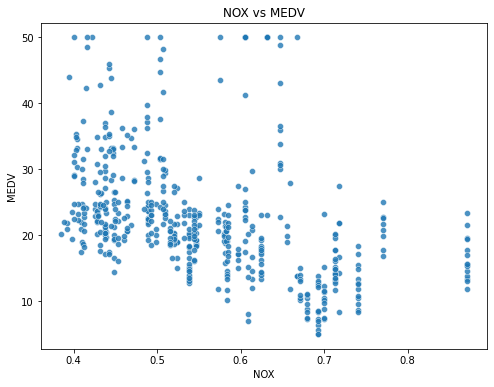

In [ ]:
#creating scatter plot to understand various correlation between NOX vs MEDV
plt.figure(figsize=(8,6))
visual5 = sns.scatterplot(x=housing_df['NOX'], y=housing_df['MEDV'], alpha=0.8)
plt.title('NOX vs MEDV')
visual5

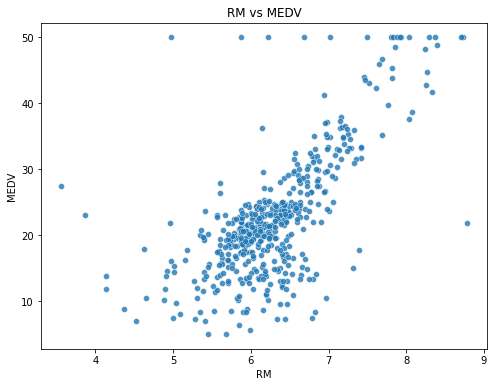

In [ ]:
#creating scatter plot to understand various correlation between RM vs MEDV
plt.figure(figsize=(8,6))
visual6 = sns.scatterplot(x=housing_df['RM'], y=housing_df['MEDV'], alpha=0.8)
plt.title('RM vs MEDV')
visual6

MEDV is positively correlated with RM (0.7)

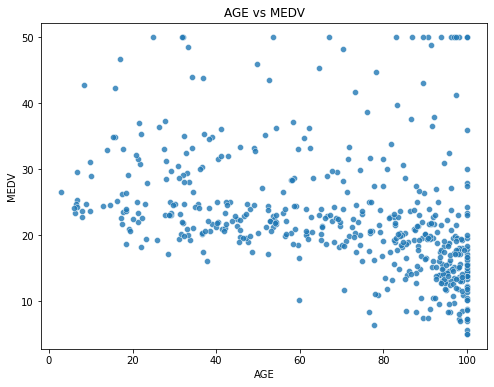

In [ ]:
#creating scatter plot to understand various correlation between AGE vs MEDV
plt.figure(figsize=(8,6))
visual7 = sns.scatterplot(x=housing_df['AGE'], y=housing_df['MEDV'], alpha=0.8)
plt.title('AGE vs MEDV')
visual7

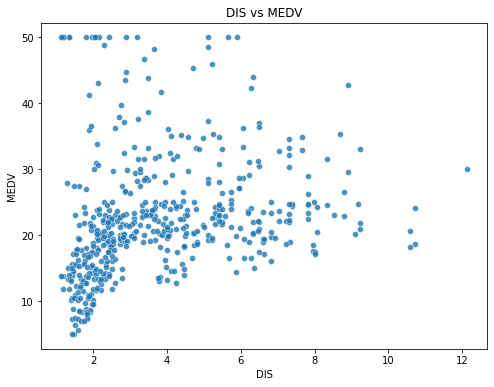

In [ ]:
#creating scatter plot to understand various correlation between DIS vs MEDV
plt.figure(figsize=(8,6))
visual8 = sns.scatterplot(x=housing_df['DIS'], y=housing_df['MEDV'], alpha=0.8)
plt.title('DIS vs MEDV')
visual8

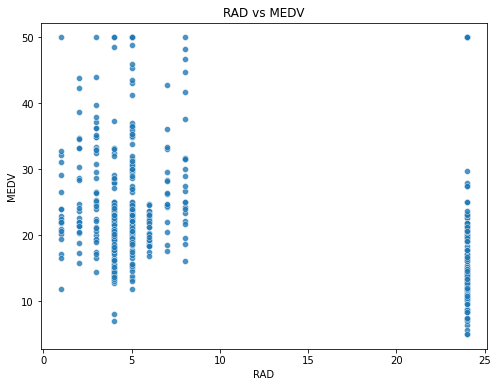

In [ ]:
#creating scatter plot to understand various correlation between RAD vs MEDV
plt.figure(figsize=(8,6))
visual9 = sns.scatterplot(x=housing_df['RAD'], y=housing_df['MEDV'], alpha=0.8)
plt.title('RAD vs MEDV')
visual9

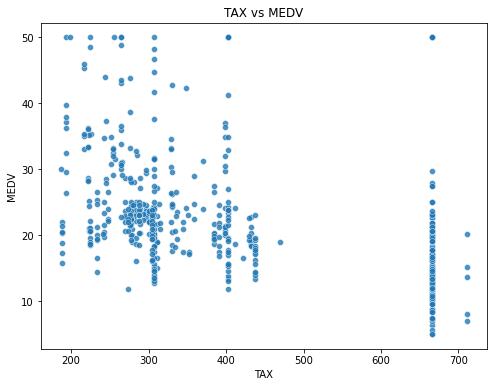

In [ ]:
#creating scatter plot to understand various correlation between TAX vs MEDV
plt.figure(figsize=(8,6))
visual10 = sns.scatterplot(x=housing_df['TAX'], y=housing_df['MEDV'], alpha=0.8)
plt.title('TAX vs MEDV')
visual10

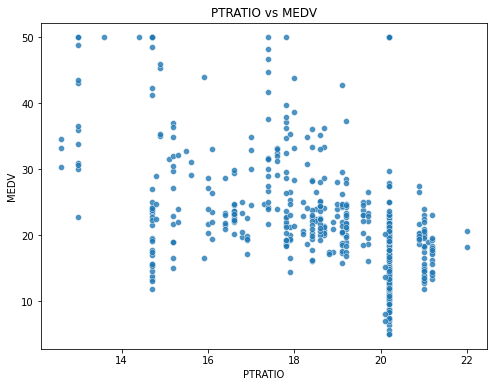

In [ ]:
#creating scatter plot to understand various correlation between PTRATIO vs MEDV
plt.figure(figsize=(8,6))
visual11 = sns.scatterplot(x=housing_df['PTRATIO'], y=housing_df['MEDV'], alpha=0.8)
plt.title('PTRATIO vs MEDV')
visual11

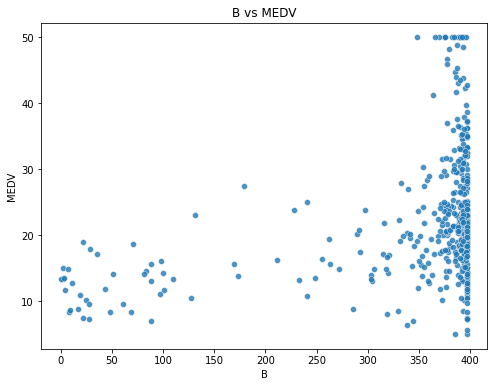

In [ ]:
#creating scatter plot to understand various correlation between B vs MEDV
plt.figure(figsize=(8,6))
visual12 = sns.scatterplot(x=housing_df['B'], y=housing_df['MEDV'], alpha=0.8)
plt.title('B vs MEDV')
visual12

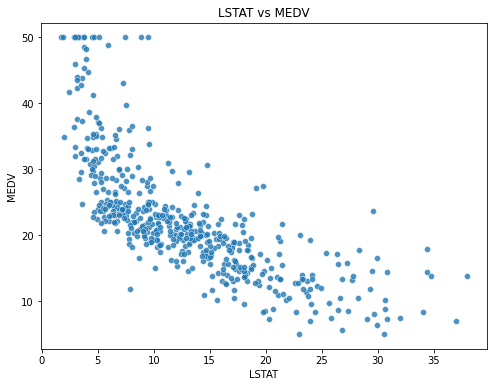

In [ ]:
#creating scatter plot to understand various correlation between LSTAT vs MEDV
plt.figure(figsize=(8,6))
visual13 = sns.scatterplot(x=housing_df['LSTAT'], y=housing_df['MEDV'], alpha=0.8)
plt.title('LSTAT vs MEDV')
visual13

MEDV is negatively correlated with LSTAT (-0.74)

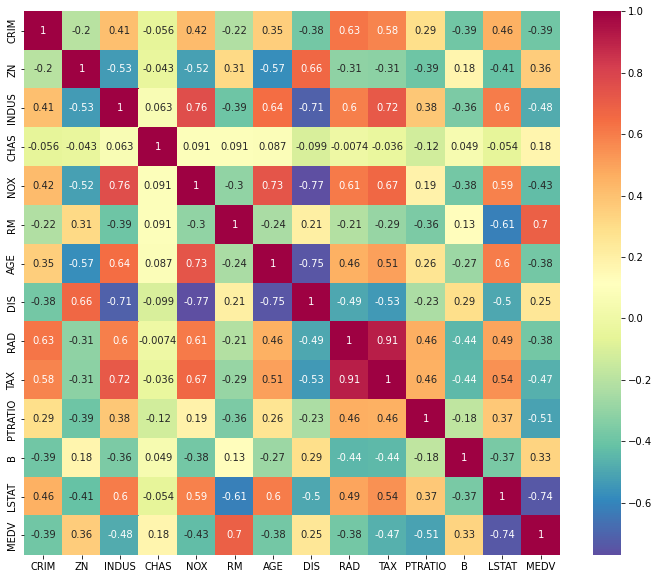

In [ ]:
plt.figure(figsize=(12,10))
visual14 = sns.heatmap(housing_df.corr(),annot=True, cmap='Spectral_r')
visual14

##From the above heatmap we can find about the dependent variable MEDV


*   MEDV is positively correlated to RM (0.7)
*   MEDV negatively correlated to LSTAT (-0.74)

##For the independent Variables:


*   TAX-RAD have highest positive correlation. 0.91
*   NOX-DIS have highest negative correlation. -0.77

Others independent Variables which seems high correlation are:
*   INDUS-NOX: 0.76
*   INDUS-DIS: 0.71
*   INDUS-TAX: 0.72
*   NOX-AGE: 0.73
*   NOX-DIS: -0.77
*   AGE-DIS: -0.75
*   RAD-RAD: 0.91

##To find linear regregression the relation between dependent and independent variables must be linear.

##We find here some multicolinearity, so we will remove some independent variables i.e. INDUS, AGE, DIS, RAD.

#MEDV

In [ ]:
#Describe MEDV
housing_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


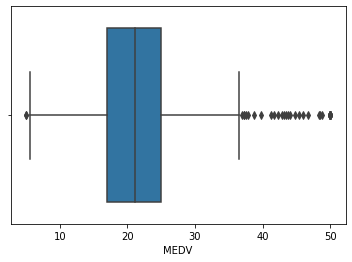

In [ ]:
sns.boxplot(housing_df['MEDV'])

In [ ]:
#Handling outlires on MEDV
q1 = np.percentile(housing_df['MEDV'],25)
q2 = np.percentile(housing_df['MEDV'],50)
q3 = np.percentile(housing_df['MEDV'],75)
IQR = q3-q1
LL = q1 - 1.5*IQR
UL = q1 + 1.5*IQR

print(f'q1 = {q1}')
print(f'q2 = {q2}')
print(f'q3 = {q3}')
print(f'IQR = {IQR}')
print(f'LL = {LL}')
print(f'UL = {UL}')

q1 = 17.025
q2 = 21.2
q3 = 25.0
IQR = 7.975000000000001
LL = 5.0624999999999964
UL = 28.9875


##Lets plot scatter plot between LSTAT and MEDV.

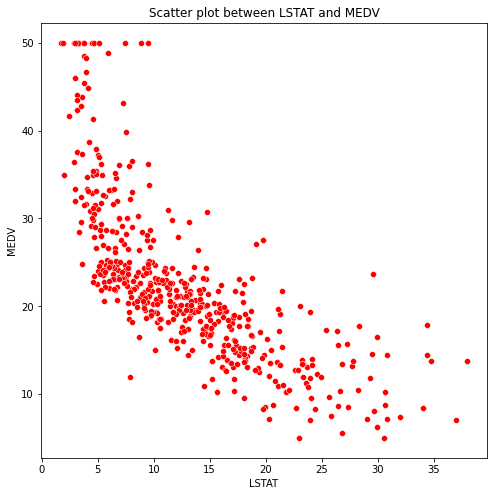

In [ ]:
plt.figure(figsize=(8,8))
visual15 = sns.scatterplot(x=housing_df['LSTAT'], y=housing_df['MEDV'],color='red')
plt.title('Scatter plot between LSTAT and MEDV')
visual15

##The above plot suggests negative linear regression, which seconds the heatmap and makes sense if we see the column we can tell as the % of lower status of the population increases, no. of owner-occupied homes in price range of $1000  would decrease.

In [ ]:
#Describe LSTAT
housing_df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


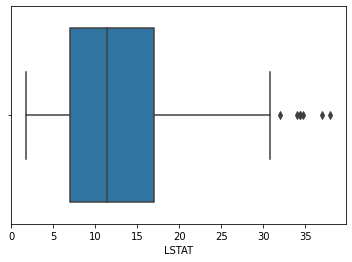

In [ ]:
sns.boxplot(housing_df['LSTAT'])

In [ ]:
#Handling outlires on LSTAT
q1 = np.percentile(housing_df['LSTAT'],25)
q2 = np.percentile(housing_df['LSTAT'],50)
q3 = np.percentile(housing_df['LSTAT'],75)
IQR = q3-q1
LL = q1 - 1.5*IQR
UL = q1 + 1.5*IQR

print(f'q1 = {q1}')
print(f'q2 = {q2}')
print(f'q3 = {q3}')
print(f'IQR = {IQR}')
print(f'LL = {LL}')
print(f'UL = {UL}')

q1 = 6.949999999999999
q2 = 11.36
q3 = 16.955000000000002
IQR = 10.005000000000003
LL = -8.057500000000005
UL = 21.957500000000003


##Lets plot scatter plot between RM and MEDV.

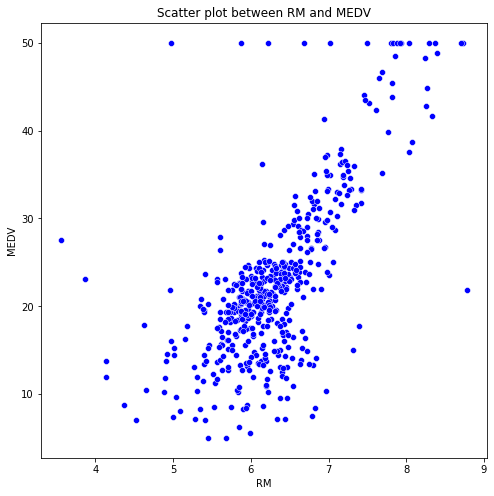

In [ ]:
plt.figure(figsize=(8,8))
visual16 = sns.scatterplot(x=housing_df['RM'], y=housing_df['MEDV'],color='blue')
plt.title('Scatter plot between RM and MEDV')
visual16

##The above plot suggests positive linear regression, which again agrees with the heatmap and makes sense if we see the column we can tell as number of rooms per dwelling increase, no. of owner-occupied homes in price range of $1000 would decrease.

In [ ]:
housing_df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [ ]:
#Handling outlires on RM
q1 = np.percentile(housing_df['RM'],25)
q2 = np.percentile(housing_df['RM'],50)
q3 = np.percentile(housing_df['RM'],75)
IQR = q3-q1
LL = q1 - 1.5*IQR
UL = q1 + 1.5*IQR

print(f'q1 = {q1}')
print(f'q2 = {q2}')
print(f'q3 = {q3}')
print(f'IQR = {IQR}')
print(f'LL = {LL}')
print(f'UL = {UL}')

q1 = 5.8854999999999995
q2 = 6.2085
q3 = 6.6235
IQR = 0.7380000000000004
LL = 4.778499999999999
UL = 6.9925


##Calculating the best fit line for LSTAT and MEDV.

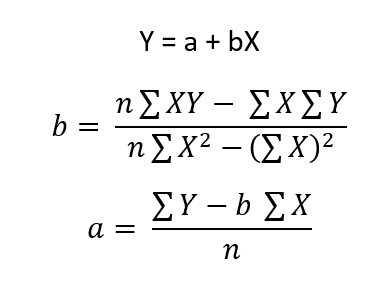


In [ ]:
LSTAT_DF = pd.DataFrame(columns = ['x', 'y'])

In [ ]:
LSTAT_DF['x'] = housing_df['LSTAT']
LSTAT_DF['y'] = housing_df['MEDV']
LSTAT_DF['x^2']= LSTAT_DF['x']**2
LSTAT_DF['xy']= LSTAT_DF['x']*LSTAT_DF['y']
LSTAT_DF.head(4)

,x,y,x^2,xy
0,4.98,24.0,24.8004,119.520
1,9.14,21.6,83.5396,197.424
2,4.03,34.7,16.2409,139.841
3,2.94,33.4,8.6436,98.196


In [ ]:
n= len(LSTAT_DF['y'])
sum_x = LSTAT_DF['x'].sum()
sum_y = LSTAT_DF['y'].sum()
sum_xy = LSTAT_DF['xy'].sum()
sum_of_x_sqr = LSTAT_DF['x^2'].sum()
sqr_of_sum_x = (sum_x)**2

In [ ]:
b = ((n*sum_xy) - (sum_x*sum_y))/((n*sum_of_x_sqr) - (sqr_of_sum_x))
a = (sum_y - b*sum_x)/n

print(b)
print(a)

-0.9500493537579933
34.55384087938314


#Final Equation
# Y = 34.55 - 0.95X

In [ ]:
LSTAT_DF['y_pred'] = 34.55 - 0.95*LSTAT_DF['x']

In [ ]:
LSTAT_DF

,x,y,x^2,xy,y_pred
0,4.98,24.0,24.8004,119.520,29.8190
1,9.14,21.6,83.5396,197.424,25.8670
2,4.03,34.7,16.2409,139.841,30.7215
3,2.94,33.4,8.6436,98.196,31.7570
4,5.33,36.2,28.4089,192.946,29.4865
...,...,...,...,...,...
501,9.67,22.4,93.5089,216.608,25.3635
502,9.08,20.6,82.4464,187.048,25.9240
503,5.64,23.9,31.8096,134.796,29.1920
504,6.48,22.0,41.9904,142.560,28.3940


Text(0, 0.5, 'MEDV')

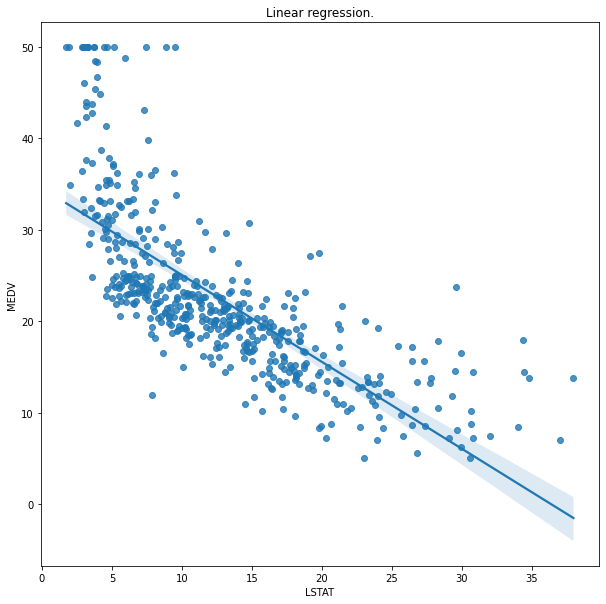

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=LSTAT_DF['x'],y=LSTAT_DF['y'])
plt.title('Linear regression.')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

##Calculating the best fit line for RM and MEDV.

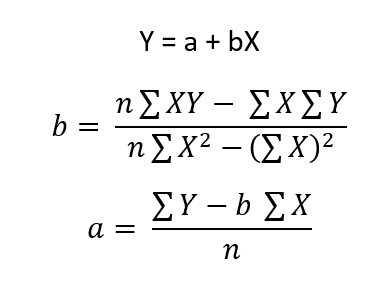


In [ ]:
RM_DF = pd.DataFrame(columns = ['x', 'y'])

In [ ]:
RM_DF['x'] = housing_df['RM']
RM_DF['y'] = housing_df['MEDV']
RM_DF['x^2']= RM_DF['x']**2
RM_DF['xy']= RM_DF['x']*RM_DF['y']
RM_DF.head(4)

,x,y,x^2,xy
0,6.575,24.0,43.230625,157.8000
1,6.421,21.6,41.229241,138.6936
2,7.185,34.7,51.624225,249.3195
3,6.998,33.4,48.972004,233.7332


In [ ]:
n= len(RM_DF['y'])
sum_x = RM_DF['x'].sum()
sum_y = RM_DF['y'].sum()
sum_xy = RM_DF['xy'].sum()
sum_of_x_sqr = RM_DF['x^2'].sum()
sqr_of_sum_x = (sum_x)**2

In [ ]:
b = ((n*sum_xy) - (sum_x*sum_y))/((n*sum_of_x_sqr) - (sqr_of_sum_x))
a = (sum_y - b*sum_x)/n

print(b)
print(a)

9.102108981180319
-34.670620776438625


#Final Equation
# Y = 34.55 - 0.95X

In [ ]:
RM_DF['y_pred'] = -34.67 + 9.102*RM_DF['x']

In [ ]:
RM_DF

,x,y,x^2,xy,y_pred
0,6.575,24.0,43.230625,157.8000,25.175650
1,6.421,21.6,41.229241,138.6936,23.773942
2,7.185,34.7,51.624225,249.3195,30.727870
3,6.998,33.4,48.972004,233.7332,29.025796
4,7.147,36.2,51.079609,258.7214,30.381994
...,...,...,...,...,...
501,6.593,22.4,43.467649,147.6832,25.339486
502,6.120,20.6,37.454400,126.0720,21.034240
503,6.976,23.9,48.664576,166.7264,28.825552
504,6.794,22.0,46.158436,149.4680,27.168988


Text(0, 0.5, 'MEDV')

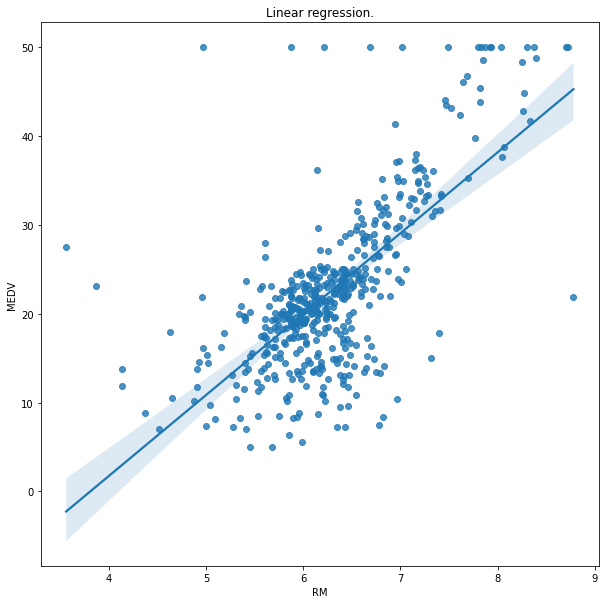

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=RM_DF['x'],y=RM_DF['y'])
plt.title('Linear regression.')
plt.xlabel('RM')
plt.ylabel('MEDV')